In [1]:
import os
import numpy as np
import gzip
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch
import torch.optim as optim
from torch.autograd import Variable

# print(os.getcwd())

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      'test-labels-idx1-ubyte.gz', 'test-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))
  

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(train_images, train_labels), (test_images, test_labels) = load_data('JPG-PNG-to-MNIST-NN-Format-master/')

2022-01-12 00:49:06.568399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-12 00:49:06.568449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images_old, train_labels_old), (test_images_old, test_labels_old) = keras.datasets.mnist.load_data()

#https://stackoverflow.com/questions/43153076/how-to-concatenate-numpy-arrays-into-a-specific-shape
#must have same dim
train_images_old = train_images_old.reshape(train_images_old.shape[0], 28, 28)
test_images_old = test_images_old.reshape(test_images_old.shape[0], 28, 28)
print(type(train_images))
print(type(train_images_old))
# train_images, train_labels, test_images, test_labels = [None, None, None, None]

if type(train_images_old) == type(train_images):
    print("Type is same, concat/merge datasets...")
    train_images = np.concatenate((train_images, train_images_old))
    train_labels = np.concatenate((train_labels, train_labels_old))
    print(train_images)
    print(train_labels)
#     test_images = np.concatenate((test_images, test_images_old))
#     test_labels = np.concatenate((test_labels, test_labels_old))
    print("Merge successed.")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Type is same, concat/merge datasets...
[[[38  0 38 ... 38 38  0]
  [ 0 38 38 ... 38 38  0]
  [ 0 38 38 ...  0  0  0]
  ...
  [ 0  0  0 ... 38 38  0]
  [38 38 38 ...  0 38  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ... 65 65  0]
  [ 0 65 65 ... 65 65  0]
  [65 65  0 ...  0 65  0]
  ...
  [65  0 65 ...  0 65  0]
  [ 0  0  0 ... 65 65  0]
  [65  0  0 ...  0  0  0]]

 [[81  0  0 ...  0  0  0]
  [ 0 81 81 ...  0  0  0]
  [81 81  0 ...  0  0  0]
  ...
  [81 81 81 ...  0  0  0]
  [ 0  0  0 ...  0 81  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [

In [3]:
#Here we load the dataset from keras
xtrain = train_images
ytrain = train_labels
xtest = test_images
ytest = test_labels
print("No of training datapoints:{}\nNo of Test datapoints:{}".format(len(xtrain),len(xtest)))
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
xtrain = torch.from_numpy(xtrain)
ytrain = torch.from_numpy(ytrain)
xtest = torch.from_numpy(xtest)
ytest = torch.from_numpy(ytest)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

No of training datapoints:60385
No of Test datapoints:634
(60385, 28, 28)
(60385,)
(634, 28, 28)
(634,)
torch.Size([60385, 28, 28])
torch.Size([60385])
torch.Size([634, 28, 28])
torch.Size([634])


/tmp/ipykernel_3845/2426798492.py:13: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  xtest = torch.from_numpy(xtest)


In [4]:
from torch.utils.data import DataLoader,Dataset,TensorDataset
import numpy

class dealDataset(Dataset):
  def __init__(self, dataset, labels, transform):
    self.data=dataset
    self.labels=labels
    self.transform=transform
    
  def __len__(self):
    return len(self.data)  
  def __getitem__(self,idx):
    data=self.data[idx].resize(1, 28, 28)
    y=self.labels[idx]

    if self.transform != None:
      data=self.transform(data)

    return (data,y)



tsfms=transforms.Compose([
#         transforms.Resize(255), 
#         transforms.CenterCrop(224),  
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(), 
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
]) 
train_data=dealDataset(xtrain, ytrain, tsfms)
test_data=dealDataset(xtest, ytest, tsfms)

loaders = {
    'train': torch.utils.data.DataLoader(train_data,
                        batch_size=32,
                        shuffle=True,
                        num_workers=0),
    'test': torch.utils.data.DataLoader(test_data,
                       batch_size=32,
                       shuffle=True,
                       num_workers=0),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f61f02f2eb0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f61f02f27c0>}

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # sefl.conv1 = nn.Conv2d()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        # self.conv2 = nn.Sequential(
        #     nn.Conv2d(16, 32, 5, 1, 2),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2),
        # )
        self.out = nn.Linear(64 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x.float())
        # x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

In [6]:
cnn = CNN()
# cnn = cnn.cuda()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=3136, out_features=10, bias=True)
)


In [7]:
loss_func = nn.CrossEntropyLoss()
loss_func
optimizer = optim.Adam(cnn.parameters(), lr=3e-4)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0003
    weight_decay: 0
)

In [29]:
loss_list = []
num_epochs = 10
def train(num_epochs, cnn, loaders):
    cnn.train()
    # Traing the model
    total_step = len(loaders['train'])
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            # print(cnn(b_x)[0])
            output = cnn(b_x)[0] 
            # print(output.type(torch.LongTensor))
            # output = output.label.long()
            loss = loss_func(output, b_y.long())
            loss_list.append(loss)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()
            if (i+1) % 100 == 0:
#                 print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    pass

model = CNN()
model.load_state_dict(torch.load("CNN_pred.pt"))
train(num_epochs, cnn, loaders)

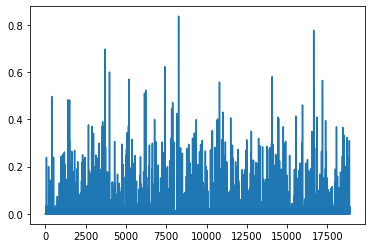

In [30]:
# loss_list = loss_list.detach().numpy()
# print(type(loss_list))
loss_list = [fl.item() for fl in loss_list ]
plt.plot(range(len(loss_list)), loss_list)

In [31]:
def test():
    # Test the model
    cnn.eval()
    accuracy = 0
    total_count = 0
    with torch.no_grad():
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy += (pred_y == labels).sum().item()
            total_count += labels.size(0)
            pass
        accuracy = accuracy / total_count
        print('Test Accuracy of the model on the 634 test images: %.2f' % accuracy)

    pass
test()

Test Accuracy of the model on the 634 test images: 0.86


In [32]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].int().tolist()
actual_number

[4, 6, 3, 2, 5, 7, 7, 4, 8, 0]

In [33]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [4 6 3 2 5 7 7 4 8 0]
Actual number: [4, 6, 3, 2, 5, 7, 7, 4, 8, 0]


In [34]:
true, pred, imgs = [], [], []
for images, labels in loaders['test']:
    test_output, last_layer = cnn(images)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    pred = torch.cat((torch.Tensor(pred), pred_y), dim=0)
    imgs = torch.cat((torch.Tensor(imgs), images), dim=0)
    true = torch.cat((torch.Tensor(true), labels), dim=0)
    pass
print(pred.shape)
print(true.shape)
# print(torch.equal(pred, true))
print(imgs.shape)

torch.Size([634])
torch.Size([634])
torch.Size([634, 1, 28, 28])


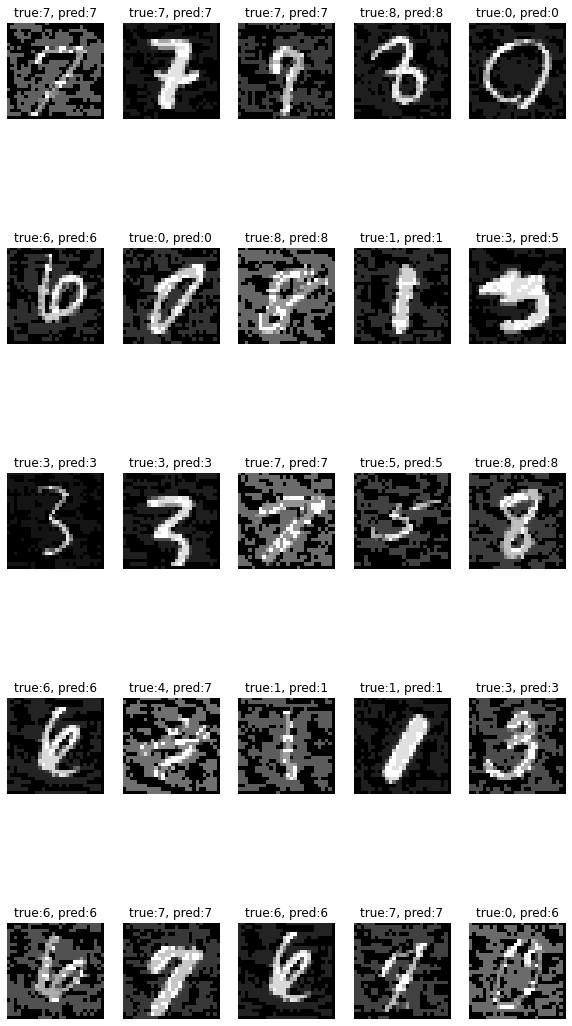

In [35]:
# print(train_data.data.size())
figure = plt.figure(figsize=(10, 20)) # 圖片大小
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(634, size=(1,)).item()
    label = pred[sample_idx] # 隨機print圖
    label_ = true[sample_idx] # 隨機print圖
    img = imgs[sample_idx]
    figure.add_subplot(rows, cols, i) # 排序
    plt.title('true:' + str(int(label_.tolist())) + ', pred:' + str(int(label.tolist())))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()